# Data Import

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.7Gi       8.3Gi       1.0Mi       2.7Gi        10Gi
Swap:             0B          0B          0B


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import numpy as np
from statistics import mean
import math

In [ ]:
user_data = pd.read_json('/content/drive/MyDrive/MOOCCube/entities/user.json', lines=True)
user_data

,id,name,course_order,enroll_time
0,U_7001215,李喜锋,"[C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp,...","[2017-05-01 11:07:53, 2017-05-17 10:07:17, 201..."
1,U_10402446,五元香,"[C_course-v1:TsinghuaX+00510888X+2019_T1, C_co...","[2019-06-14 08:50:04, 2019-01-04 20:36:07]"
2,U_10359065,魏珊,"[C_course-v1:TsinghuaX+00612642X+sp, C_course-...","[2019-01-18 21:19:56, 2019-01-14 21:54:54]"
3,U_7423998,郭海滨,"[C_course-v1:TsinghuaX+30240184_2X+sp, C_cours...","[2017-08-16 10:38:11, 2018-07-01 18:24:24, 201..."
4,U_545306,李其艳,"[C_course-v1:TsinghuaX+20430064_2X+sp, C_cours...","[2018-09-05 15:40:40, 2019-02-28 10:08:49, 201..."
...,...,...,...,...
199194,U_9447602,羊舌半凡,"[C_course-v1:TsinghuaX+00612642X+sp, C_course-...","[2018-07-08 15:02:53, 2018-08-24 10:04:58, 201..."
199195,U_7517918,焦彭越,"[C_course-v1:TsinghuaX+20250064+sp, C_course-v...","[2018-05-06 16:37:18, 2017-08-28 18:10:53]"
199196,U_8665537,锺才俊,"[C_course-v1:TsinghuaX+30240243X+sp, C_course-...","[2018-03-12 11:02:22, 2018-05-03 10:29:23]"
199197,U_10621245,忻盼曼,"[C_course-v1:TsinghuaX+30700313X+2019_T1, C_co...","[2019-03-19 13:28:00, 2019-04-23 20:28:01, 201..."


Import main data which come from user entities. The historical sequence of course for each user will be the main input or data that will be used for modelling.

# Data Understanding and Preprocessing.

In [ ]:
user_data.shape

(199199, 4)

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199199 entries, 0 to 199198
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            199199 non-null  object
 1   name          199199 non-null  object
 2   course_order  199199 non-null  object
 3   enroll_time   199199 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


## Missing data

In [ ]:
user_data.isnull().sum()

id              0
name            0
course_order    0
enroll_time     0
dtype: int64

In [ ]:
user_data.isnull().sum().any()

False

In [ ]:
user_data.isnull().sum()

id              0
name            0
course_order    0
enroll_time     0
dtype: int64

In [ ]:
user_data.isnull().sum().any()

False

No missing data

## Check the number of courses taken for each student

In [ ]:
num_course = []

for i in range(len(user_data)):
  num_course.append(len(user_data['course_order'][i]))

user_data['number_of_course'] = num_course

In [ ]:
user_data

,id,name,course_order,enroll_time,number_of_course
0,U_7001215,李喜锋,"[C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp,...","[2017-05-01 11:07:53, 2017-05-17 10:07:17, 201...",5
1,U_10402446,五元香,"[C_course-v1:TsinghuaX+00510888X+2019_T1, C_co...","[2019-06-14 08:50:04, 2019-01-04 20:36:07]",2
2,U_10359065,魏珊,"[C_course-v1:TsinghuaX+00612642X+sp, C_course-...","[2019-01-18 21:19:56, 2019-01-14 21:54:54]",2
3,U_7423998,郭海滨,"[C_course-v1:TsinghuaX+30240184_2X+sp, C_cours...","[2017-08-16 10:38:11, 2018-07-01 18:24:24, 201...",7
4,U_545306,李其艳,"[C_course-v1:TsinghuaX+20430064_2X+sp, C_cours...","[2018-09-05 15:40:40, 2019-02-28 10:08:49, 201...",10
...,...,...,...,...,...
199194,U_9447602,羊舌半凡,"[C_course-v1:TsinghuaX+00612642X+sp, C_course-...","[2018-07-08 15:02:53, 2018-08-24 10:04:58, 201...",5
199195,U_7517918,焦彭越,"[C_course-v1:TsinghuaX+20250064+sp, C_course-v...","[2018-05-06 16:37:18, 2017-08-28 18:10:53]",2
199196,U_8665537,锺才俊,"[C_course-v1:TsinghuaX+30240243X+sp, C_course-...","[2018-03-12 11:02:22, 2018-05-03 10:29:23]",2
199197,U_10621245,忻盼曼,"[C_course-v1:TsinghuaX+30700313X+2019_T1, C_co...","[2019-03-19 13:28:00, 2019-04-23 20:28:01, 201...",5


## Filter Course Sequence

In [ ]:
user_data_range = user_data[(user_data["number_of_course"] >= 5) & (user_data["number_of_course"] <= 10) ]

Use appropriate minum and maximum number of courses for simplicity. I choose to have courses sequence within 5 to 10 courses for each student

In [ ]:
user_data_range

,id,name,course_order,enroll_time,number_of_course
0,U_7001215,李喜锋,"[C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp,...","[2017-05-01 11:07:53, 2017-05-17 10:07:17, 201...",5
3,U_7423998,郭海滨,"[C_course-v1:TsinghuaX+30240184_2X+sp, C_cours...","[2017-08-16 10:38:11, 2018-07-01 18:24:24, 201...",7
4,U_545306,李其艳,"[C_course-v1:TsinghuaX+20430064_2X+sp, C_cours...","[2018-09-05 15:40:40, 2019-02-28 10:08:49, 201...",10
7,U_7594103,巴鹏,"[C_course-v1:TsinghuaX+30240184+sp, C_course-v...","[2018-07-15 20:45:57, 2018-01-18 20:59:34, 201...",6
13,U_3234246,称语山,"[C_course-v1:TsinghuaX+00740123_X+sp, C_course...","[2017-02-27 22:15:55, 2018-12-08 20:23:01, 201...",5
...,...,...,...,...,...
199185,U_6380402,梁安康,"[C_course-v1:XJTU+C00204+sp, C_course-v1:Tsing...","[2018-09-19 16:51:11, 2017-09-20 11:11:01, 201...",6
199193,U_9447603,薛烨烨,"[C_course-v1:TsinghuaX+64100033X+SP, C_course-...","[2018-07-19 18:25:08, 2019-03-10 21:03:39, 201...",8
199194,U_9447602,羊舌半凡,"[C_course-v1:TsinghuaX+00612642X+sp, C_course-...","[2018-07-08 15:02:53, 2018-08-24 10:04:58, 201...",5
199197,U_10621245,忻盼曼,"[C_course-v1:TsinghuaX+30700313X+2019_T1, C_co...","[2019-03-19 13:28:00, 2019-04-23 20:28:01, 201...",5


## Data sample

In [ ]:
user_data_sample = user_data_range.sample(frac=0.3, random_state = 41)

In [ ]:
user_data_sample

,id,name,course_order,enroll_time,number_of_course
6865,U_758099,漆玉,"[C_course-v1:TsinghuaX+00740043X_2015_T2+sp, C...","[2017-10-29 22:19:03, 2016-01-08 13:20:08, 201...",9
156830,U_9265115,太叔紫翠,"[C_course-v1:TsinghuaX+10430484X_2015_2+sp, C_...","[2018-06-14 18:08:34, 2018-09-09 20:12:24, 201...",6
57340,U_6915226,麦凝荷,"[C_course-v1:TsinghuaX+00690212X+sp, C_course-...","[2017-08-21 19:59:48, 2019-05-26 19:59:59, 201...",5
126720,U_2548979,赛寻双,"[C_course-v1:TsinghuaX+10421075X_2015_2+sp, C_...","[2018-05-02 10:12:06, 2017-07-04 08:21:05, 201...",8
93893,U_7150581,那妙竹,"[C_course-v1:TsinghuaX+40050444X+sp, C_course-...","[2017-08-13 19:21:01, 2018-03-16 09:45:49, 201...",5
...,...,...,...,...,...
58752,U_6635930,门元恺,"[C_course-v1:TsinghuaX+Pr20170406-SC_p1+sp, C_...","[2017-08-14 10:53:21, 2017-08-04 07:36:53, 201...",8
73942,U_3133278,声谷,"[C_course-v1:TsinghuaX+30700313X+sp, C_course-...","[2019-08-12 15:56:34, 2019-04-20 20:24:58, 201...",6
118769,U_1976347,似初南,"[C_course-v1:CUNY+20171211001+sp, C_course-v1:...","[2019-05-19 10:19:37, 2018-11-16 17:07:59, 201...",6
99802,U_5325210,陈承,"[C_course-v1:TsinghuaX+70250023X_2015_2+sp, C_...","[2016-11-10 15:26:17, 2017-03-23 22:54:06, 201...",9


Data is further filtered by sampling, only take 30% from 30K rows.

In [ ]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(user_data_sample)

U_758099      1
U_9005717     1
U_9589535     1
U_8386334     1
U_101472      1
             ..
U_10443694    1
U_9889935     1
U_160094      1
U_459021      1
U_8028961     1
Name: id, Length: 8961, dtype: int64
_____________________________________________________________________________
漆玉     1
丁永桂    1
空锐立    1
厚天空    1
融鸿宝    1
      ..
庚欣嘉    1
仙信厚    1
陈令山    1
英凝雁    1
禽瀚漠    1
Name: name, Length: 8961, dtype: int64
_____________________________________________________________________________
[C_course-v1:MITx+6_00_1x+sp, C_course-v1:TsinghuaX+00740123_X+sp, C_course-v1:TsinghuaX+30240243X+sp, C_course-v1:TsinghuaX+30240184+sp, C_course-v1:TsinghuaX+30240184_2X+sp]                                                                                                                                                                                                              2
[C_course-v1:TsinghuaX+20250103X+sp, C_course-v1:TsinghuaX+20250064X+sp, C_course-v1:TsinghuaX+20250064+sp, C_

## Course Sequence Gathering and Transfomration

In [ ]:
course_order_list = user_data_sample["course_order"].tolist()
course_order_list

obtain the course sequence for each student and transform to list for further processing.

## Zero Padding

In [ ]:
zero_pad_course_order = []

for i in course_order_list:
  zero_pad_course_order.append([0]*(10-len(i))+i)

In [ ]:
zero_pad_course_order

Zero left pad to ensure all the data have similar length

## Check Sequence Length of the Data

In [ ]:
list_check = []
for i in zero_pad_course_order:
  list_check.append(len(i))

In [ ]:
array_check = np.array(list_check)
print(np.unique(array_check))

[10]


All data contained 10 sequence lengths.

## Course ID Gathering

### Extract all course ID in the dataset

In [ ]:
course_all_data = pd.read_json('/content/drive/MyDrive/MOOCCube/entities/course.json', lines=True)
course_all_data

,id,name,prerequisites,about,core_id,video_order,display_name,chapter
0,C_course-v1:McGillX+ATOC185x+2015_T1,自然灾害（自主模式）,无,<p>地球上没有一处地方不发生自然灾害。当我们以科学的眼光看待这些自然灾害的原因和本质时，我...,C_course-v1:McGillX+ATOC185x+2015_T1,"[V_f6f710068b994452885b90e11b6ee5c5, V_7339568...","[Video: Overview 1, Video: Overview 2, Video: ...","[01.02.01.02, 01.02.03.02, 01.02.05.02, 01.02...."
1,C_course-v1:TsinghuaX+THESIS2015X+2015_T1,2015年清华大学研究生学位论文答辩（二）,无先修要求,<p>学位论文答辩环节是研究生培养的重要环节，为了充分发挥该环节的育人作用，搭建学术交流的平...,C_course-v1:TsinghuaX+THESIS2015X+2015_T1,"[V_de0371575a9f4b5391c89ad16d68b5c2, V_d632034...","[答辩陈述, 答辩陈述, 问答及答辩结果, 答辩陈述, 问答及答辩结果, 答辩陈述, 问答及...","[01.01.03.01, 01.02.03.01, 01.02.04.01, 01.03...."
2,C_course-v1:TsinghuaX+THESIS2014_1X_tv+_2014_,2014年清华大学研究生学位论文答辩（一）,无先修要求,<p>学位论文答辩环节是研究生培养的重要环节，为了充分发挥该环节的育人作用，搭建学术交流的平...,C_course-v1:TsinghuaX+THESIS2014_1X_tv+_2014_,"[V_d530be9cc0584317a16706684577a6dd, V_f329a62...","[论文答辩实况, 问答及答辩结果, 导师评价, 同学眼中的王鑫, 个人学术感言, 吴宇恩答辩...","[01.01.03.01, 01.01.04.01, 01.01.05.01, 01.01...."
3,C_course-v1:TsinghuaX+THESIS2015X_tv+2015_T1,2015年清华大学研究生学位论文答辩（一）,无先修要求,<p>学位论文答辩环节是研究生培养的重要环节，为了充分发挥该环节的育人作用，搭建学术交流的平...,C_course-v1:TsinghuaX+THESIS2015X+2015_T1,"[V_de0371575a9f4b5391c89ad16d68b5c2, V_78a8b41...","[答辩陈述, 问答及答辩结果, 答辩陈述, 问答及答辩结果, 答辩陈述, 问答及答辩结果, ...","[01.01.03.01, 01.01.04.01, 01.02.03.01, 01.02...."
4,C_course-v1:TsinghuaX+00690242+sp,文物精品与文化中国（自主模式）,无,<p>中国考古学是以往100年中发展最为迅速的领域之一，大批珍贵文物的出土，不断刷新人们对文...,C_course-v1:TsinghuaX+00690242+sp,"[V_d7dbd0fe8f504e7a91d863cd5a19b185, V_4492eca...","[文献所见原始渡河工具, 《禹贡》所见的水路交通, 绰墩山出土的渡河浮木, 舟船考古发掘, ...","[01.01.01.01, 01.01.02.01, 01.02.01.01, 01.03...."
...,...,...,...,...,...,...,...,...
701,C_course-v1:TW+2018052501X+2019_T3,STEM课程设计与案例分析（2019秋）,无,<p>\r\n\t《STEM课程设计与案例分析》课程，它是：<br />\r\n1.国内领先...,C_course-v1:TW+2018052501X+2019_T3,"[V_8f28c813854c444f98950e5404301f0b, V_f23a8ad...","[何为 STEM 教育, STEM 教育的起源与发展, 世界各国的 STEM 教育政策, 为...","[01.01.01.02, 01.02.01.01, 01.03.01.01, 01.04...."
702,C_course-v1:TsinghuaX+60700052X+2019_T2,数据科学导论（2019夏）,本课程适合各类学科背景学生学习,本课程作为数据科学的先导课和认知类课程，致力于以形象生动的教学模式为学生普及数据挖掘、大数据...,C_course-v1:TsinghuaX+60700052X+2019_T1,"[V_2aa0936927744c3b9f1dcc8b5bc30fba, V_2def333...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."
703,C_course-v1:TsinghuaX+80515182X+2019_sp,麦肯锡“全球领导力”自主模式,Basic knowledge of business administration,<p>\r\n\t脱胎于清华经管学院与麦肯锡公司联合开设的线下金牌课程，麦肯锡全球领导力在线...,C_course-v1:TsinghuaX+80515182X+2019_sp,"[V_ab97fe9d9a744958b886aa74d44146f8, V_8973856...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 02.01...."
704,C_course-v1:NEU+2019012201X+2019_T2,物理化学（上）（2019夏）,高等数学,物理化学（上）是一门运用物理学手段和技术研究化学问题的学科，被誉为化学学科的“大脑”。本课程...,C_course-v1:NEU+2019012201X+2019_T2,"[V_6595d9e0894848348287b8abaa30dce6, V_4dc4a13...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 02.01.01.01, 02.02.01.01, 02.03...."


In [ ]:
all_course = [i for i in course_all_data['id']]

In [ ]:
all_course

Gather all courses in the dataset.

### Extract all course ID in the sample data

In [ ]:
course_sample = [j for sub in course_order_list for j in sub]

In [ ]:
course_sample

In [ ]:
course_sample = np.unique(course_sample)

In [ ]:
course_sample

Gather all course in the data sample

In [ ]:
len(course_sample)

660

There are 660 courses in the data sample.


## Course and Teacher Relation

In [ ]:
teacher_course_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/teacher-course.json', sep='\t', header=None)
teacher_course_relation

,0,1
0,T_方维奇,C_course-v1:SPI+20170828001x+sp
1,T_方维奇,C_course-v1:SXPI+20170828001x+2019_T1
2,T_范茂魁,C_course-v1:PSFFC+2018102405X+2018_T2
3,T_连小珉,C_course-v1:TsinghuaX+70150104_2X+2019_T1
4,T_连小珉,C_course-v1:TsinghuaX+70150104X+2019_T1
...,...,...
2344,T_徐君莉,C_course-v1:NEU+2018122401X+2019_T1
2345,T_薛庆,C_course-v1:BIT+100070018+2019_T2
2346,T_史静琤,C_course-v1:CSU+20180919X+2019_T1
2347,T_刘小冰,C_course-v1:TsinghuaX+80515522X+sp


In [ ]:
teacher_course_relation.set_axis(['teacher', 'course'], axis='columns', inplace=True)

<ipython-input-34-44f424829db4>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  teacher_course_relation.set_axis(['teacher', 'course'], axis='columns', inplace=True)


Set the columns name.

In [ ]:
teacher_course_relation

,teacher,course
0,T_方维奇,C_course-v1:SPI+20170828001x+sp
1,T_方维奇,C_course-v1:SXPI+20170828001x+2019_T1
2,T_范茂魁,C_course-v1:PSFFC+2018102405X+2018_T2
3,T_连小珉,C_course-v1:TsinghuaX+70150104_2X+2019_T1
4,T_连小珉,C_course-v1:TsinghuaX+70150104X+2019_T1
...,...,...
2344,T_徐君莉,C_course-v1:NEU+2018122401X+2019_T1
2345,T_薛庆,C_course-v1:BIT+100070018+2019_T2
2346,T_史静琤,C_course-v1:CSU+20180919X+2019_T1
2347,T_刘小冰,C_course-v1:TsinghuaX+80515522X+sp


In [ ]:
teacher_course_relation = teacher_course_relation.iloc[:,[1, 0]]

Change the position of each column.

In [ ]:
teacher_course_relation = teacher_course_relation[teacher_course_relation['course'].isin(course_sample)]

Filter the dataframe where it contains courses only from the sample data.

In [ ]:
teacher_course_relation

,course,teacher
0,C_course-v1:SPI+20170828001x+sp,T_方维奇
1,C_course-v1:SXPI+20170828001x+2019_T1,T_方维奇
2,C_course-v1:PSFFC+2018102405X+2018_T2,T_范茂魁
3,C_course-v1:TsinghuaX+70150104_2X+2019_T1,T_连小珉
4,C_course-v1:TsinghuaX+70150104X+2019_T1,T_连小珉
...,...,...
2344,C_course-v1:NEU+2018122401X+2019_T1,T_徐君莉
2345,C_course-v1:BIT+100070018+2019_T2,T_薛庆
2346,C_course-v1:CSU+20180919X+2019_T1,T_史静琤
2347,C_course-v1:TsinghuaX+80515522X+sp,T_刘小冰


In [ ]:
len(np.unique(teacher_course_relation['course']))

651

A dataframe of course with their respective teacher is created. The dataframe consists only of courses from the sample data.

## Course and School Relation

In [ ]:
school_course_relation = pd.read_csv('/content/drive/MyDrive/MOOCCube/relations/school-course.json', sep='\t', header=None)
school_course_relation

,0,1
0,S_BNU,C_course-v1:BNU+CSL21148501+2018_T2
1,S_BNU,C_course-v1:BNU+GE310141091+2019_T1
2,S_BNU,C_course-v1:BNU+2017112001X+2019_T1
3,S_BNU,C_course-v1:BNU+2018122603X+2018_T2
4,S_BNU,C_course-v1:BNU+CSL21126882+2019_T1
...,...,...
700,S_PSFFC,C_course-v1:PSFFC+2018102405X+2018_T2
701,S_PSFFC,C_course-v1:PSFFC+2018102403X+2018_T2
702,S_PSFFC,C_course-v1:PSFFC+2018102406X+2018_T2
703,S_PSFFC,C_course-v1:PSFFC+2018102404X+2018_T2


In [ ]:
school_course_relation.set_axis(['school', 'course'], axis='columns', inplace=True)

<ipython-input-41-ce3aad33b220>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  school_course_relation.set_axis(['school', 'course'], axis='columns', inplace=True)


Set the columns name.

In [ ]:
school_course_relation

,school,course
0,S_BNU,C_course-v1:BNU+CSL21148501+2018_T2
1,S_BNU,C_course-v1:BNU+GE310141091+2019_T1
2,S_BNU,C_course-v1:BNU+2017112001X+2019_T1
3,S_BNU,C_course-v1:BNU+2018122603X+2018_T2
4,S_BNU,C_course-v1:BNU+CSL21126882+2019_T1
...,...,...
700,S_PSFFC,C_course-v1:PSFFC+2018102405X+2018_T2
701,S_PSFFC,C_course-v1:PSFFC+2018102403X+2018_T2
702,S_PSFFC,C_course-v1:PSFFC+2018102406X+2018_T2
703,S_PSFFC,C_course-v1:PSFFC+2018102404X+2018_T2


In [ ]:
school_course_relation = school_course_relation.iloc[:,[1, 0]]

Change the position of school and course feature.

In [ ]:
school_course_relation

,course,school
0,C_course-v1:BNU+CSL21148501+2018_T2,S_BNU
1,C_course-v1:BNU+GE310141091+2019_T1,S_BNU
2,C_course-v1:BNU+2017112001X+2019_T1,S_BNU
3,C_course-v1:BNU+2018122603X+2018_T2,S_BNU
4,C_course-v1:BNU+CSL21126882+2019_T1,S_BNU
...,...,...
700,C_course-v1:PSFFC+2018102405X+2018_T2,S_PSFFC
701,C_course-v1:PSFFC+2018102403X+2018_T2,S_PSFFC
702,C_course-v1:PSFFC+2018102406X+2018_T2,S_PSFFC
703,C_course-v1:PSFFC+2018102404X+2018_T2,S_PSFFC


In [ ]:
school_course_relation = school_course_relation[school_course_relation['course'].isin(course_sample)]

Filter the dataframe where it contains courses only from the sample data.

In [ ]:
school_course_relation

,course,school
0,C_course-v1:BNU+CSL21148501+2018_T2,S_BNU
1,C_course-v1:BNU+GE310141091+2019_T1,S_BNU
3,C_course-v1:BNU+2018122603X+2018_T2,S_BNU
4,C_course-v1:BNU+CSL21126882+2019_T1,S_BNU
5,C_course-v1:BNU+0610073991+2019_T1,S_BNU
...,...,...
699,C_course-v1:PSFFC+2018102402X+2018_T2,S_PSFFC
700,C_course-v1:PSFFC+2018102405X+2018_T2,S_PSFFC
701,C_course-v1:PSFFC+2018102403X+2018_T2,S_PSFFC
702,C_course-v1:PSFFC+2018102406X+2018_T2,S_PSFFC


A dataframe of course with their respective school is created. The dataframe consists only of courses from the sample data.

## Course Sequence Dataframe Construction

In [ ]:
course_columns = ['course_1', 'course_2', 'course_3', 'course_4', 'course_5', 'course_6', 'course_7', 'course_8', 'course_9', 'course_10']

Named the columns

In [ ]:
data_course = pd.DataFrame(zero_pad_course_order, columns = course_columns, dtype = str)

In [ ]:
data_course

,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,course_9,course_10
0,0,C_course-v1:TsinghuaX+00740043X_2015_T2+sp,C_course-v1:TsinghuaX+10421084X_2015_2+sp,C_course-v1:TsinghuaX+00690092X+sp,C_course-v1:TsinghuaX+30240243X+sp,C_course-v1:TsinghuaX+10430484X_2015_2+sp,C_course-v1:TsinghuaX+20430064_2X+sp,C_course-v1:TsinghuaX+10430494X_2015_2+sp,C_course-v1:TsinghuaX+20430064X+sp,C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp
1,0,0,0,0,C_course-v1:TsinghuaX+10430484X_2015_2+sp,C_course-v1:TsinghuaX+20330334X_2015_2+sp,C_course-v1:TsinghuaX+10430494X_2015_2+sp,C_course-v1:TsinghuaX+20220053X_2015_T2+sp,C_course-v1:TsinghuaX+00740043X_2015_T2+sp,C_course-v1:CQU+MATH20041X+2019_T1
2,0,0,0,0,0,C_course-v1:TsinghuaX+00690212X+sp,C_course-v1:TsinghuaX+00670122X+2019_T1,C_course-v1:Tsinghua+20150001+sp,C_course-v1:UQx+Think101x+sp,C_course-v1:TsinghuaX+00670122X+sp
3,0,0,C_course-v1:TsinghuaX+10421075X_2015_2+sp,C_course-v1:TsinghuaX+20220332X+sp,C_course-v1:TsinghuaX+80240372X+2019_T1,C_course-v1:TsinghuaX+10421094X_2015_2+sp,C_course-v1:RiceX+AdvBIO_1x+sp,C_course-v1:TsinghuaX+10430484X_2015_2+sp,C_course-v1:TsinghuaX+10430494X_2015_2+sp,C_course-v1:TsinghuaX+10421084X_2015_2+sp
4,0,0,0,0,0,C_course-v1:TsinghuaX+40050444X+sp,C_course-v1:XIYOU+20180208+sp,C_course-v1:TsinghuaX+30240184+sp,C_course-v1:UQx+BIOIMG101x+sp,C_course-v1:SCUT+145033+sp
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,C_course-v1:TsinghuaX+Pr20170406-SC_p1+sp,C_course-v1:TsinghuaX+20250103X+sp,C_course-v1:TsinghuaX+81020142X+sp,C_course-v1:TsinghuaX+30260112X+sp,C_course-v1:NJU+C1026+2016_T2,C_course-v1:TsinghuaX+00691153X+sp,C_course-v1:TsinghuaX+60240202X+sp,C_course-v1:TsinghuaX+80000901X_2+sp
8957,0,0,0,0,C_course-v1:TsinghuaX+30700313X+sp,C_course-v1:TsinghuaX+AP000016X+2019_T1,C_course-v1:MITx+15_390_2x+sp,C_course-v1:MITx+6_00_1x+sp,C_course-v1:TsinghuaX+00740043X_2015_T2+sp,C_course-v1:UQx+Think101x+sp
8958,0,0,0,0,C_course-v1:CUNY+20171211001+sp,C_course-v1:WageningenX+NUTR101x+sp,C_course-v1:TsinghuaX+2018032801X+2018_T1,C_course-v1:MITx+6_00_1x+sp,C_course-v1:RiceX+RELI157x+sp,C_course-v1:TsinghuaX+70000662+2019_T1
8959,0,C_course-v1:TsinghuaX+70250023X_2015_2+sp,C_course-v1:WUT+1022817X+sp,C_course-v1:MITx+15_390_2x+sp,C_course-v1:TsinghuaX+70660542X+2015_T2,C_course-v1:TsinghuaX+00690342X+sp,C_course-v1:TsinghuaX+60240202X+sp,C_course-v1:FudanX+SOSC120007+sp,C_course-v1:MITx+6_00_1x+sp,C_course-v1:TsinghuaX+THESIS2015X+2015_T1


The course data consists of 10 columns from the first course until the final course order for each student (number or row represent number of stundent).

## School Sequence Dataframe Construction

In [ ]:
data_school = data_course.copy()

In [ ]:
dict_lookup_course_school = dict(zip(school_course_relation['course'], school_course_relation['school']))
dict_lookup_course_school

{'C_course-v1:BNU+CSL21148501+2018_T2': 'S_BNU',
 'C_course-v1:BNU+GE310141091+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018122603X+2018_T2': 'S_BNU',
 'C_course-v1:BNU+CSL21126882+2019_T1': 'S_BNU',
 'C_course-v1:BNU+0610073991+2019_T1': 'S_BNU',
 'C_course-v1:BNU+1010070372+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2017053101X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+GE410081071-01+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018122602X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018091301X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018091302X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018091303X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+PHI2107404101+2019_T1': 'S_BNU',
 'C_course-v1:BNU+0610073981+2019_T1': 'S_BNU',
 'C_course-v1:BNU+0210021441+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2017071001X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018091305X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2018011801X+2019_T1': 'S_BNU',
 'C_course-v1:BNU+ENV13018+2019_T1': 'S_BNU',
 'C_course-v1:BNU+2017001+2018_T2': 'S_BNU',
 'C_course-v1:BNU+GOV21089

In [ ]:
dict_lookup_course_school['0'] = '0'

In [ ]:
len(dict_lookup_course_school)

660

In [ ]:
dict_lookup_course_school['C_course-v1:TsinghuaX+AP000003X+2019_T1'] = 'S_TsinghuaX'

Some of the courses did not have a school name. So add a school name for the course without the school name using the majority of school names in the data.

The dictionary lookup is constructed.

In [ ]:
for i in course_columns:
  data_school[i] = [dict_lookup_course_school[item] for item in data_school[i]]

Encode the course name with the school name.

In [ ]:
school_columns = ['school_1', 'school_2', 'school_3', 'school_4', 'school_5', 'school_6', 'school_7', 'school_8', 'school_9', 'school_10']

In [ ]:
data_school.columns = school_columns

Named the columns

In [ ]:
data_school

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9,school_10
0,0,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX
1,0,0,0,0,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_cqu
2,0,0,0,0,0,S_TsinghuaX,S_TsinghuaX,S_TSINGHUA,S_UQx,S_TsinghuaX
3,0,0,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_RiceX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX
4,0,0,0,0,0,S_TsinghuaX,S_XIYOU,S_TsinghuaX,S_UQx,S_SCUT
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_NJU,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX
8957,0,0,0,0,S_TsinghuaX,S_TsinghuaX,S_MITx,S_MITx,S_TsinghuaX,S_UQx
8958,0,0,0,0,S_CUNY,S_WageningenX,S_TsinghuaX,S_MITx,S_RiceX,S_TsinghuaX
8959,0,S_TsinghuaX,S_WUT,S_MITx,S_TsinghuaX,S_TsinghuaX,S_TsinghuaX,S_FUDANx,S_MITx,S_TsinghuaX


The school data consists of 10 columns from the first school until the final school order for each student (number or row represent number of stundent).

## Teacher Sequence Dataframe Construction

In [ ]:
data_teacher = data_course.copy()

In [ ]:
dict_lookup_course_teacher = dict(zip(teacher_course_relation['course'], teacher_course_relation['teacher']))
dict_lookup_course_teacher

{'C_course-v1:SPI+20170828001x+sp': 'T_姚常青',
 'C_course-v1:SXPI+20170828001x+2019_T1': 'T_姚常青',
 'C_course-v1:PSFFC+2018102405X+2018_T2': 'T_赵石楠',
 'C_course-v1:TsinghuaX+70150104_2X+2019_T1': 'T_连小珉',
 'C_course-v1:TsinghuaX+70150104X+2019_T1': 'T_连小珉',
 'C_course-v1:TJU+2010241X+sp': 'T_张德顺',
 'C_course-v1:TsinghuaX+20250103X+sp': 'T_任艳频',
 'C_course-v1:KMUSTX+8219011+2019_T1': 'T_王裕森',
 'C_course-v1:BIFT+2018122901X+2018_T2': 'T_丁雅琼',
 'C_course-v1:PSFFC+2018102403X+2018_T2': 'T_陶昆',
 'C_course-v1:BUCM+2018122604X+2018_T2': 'T_周芬',
 'C_course-v1:BUCM+2018122604X+2019_T1': 'T_周芬',
 'C_course-v1:TsinghuaX+20180919X+2019_T1': 'T_靳卫萍',
 'C_course-v1:SCUT+145033+sp': 'T_杨俊荣',
 'C_course-v1:BNU+2018091303X+2019_T1': 'T_孙璞',
 'C_course-v1:BNU+2018091304X+2019_T1': 'T_杨兆春',
 'C_course-v1:HIT+13SC20301820+2019_T1': 'T_孙洁',
 'C_course-v1:TsinghuaX+40050455_2X+sp': 'T_黄霞',
 'C_course-v1:nxu+2018122711+2018_T2': 'T_段玉泉',
 'C_course-v1:TsinghuaX+60610231+2016_T2_SP': 'T_王  前',
 'C_course-v1:Tsin

In [ ]:
dict_lookup_course_teacher['0'] = '0'

In [ ]:
len(dict_lookup_course_teacher)

652

In [ ]:
list(set(list(teacher_course_relation['course'])).symmetric_difference(set(course_sample)))

['C_course-v1:HBNU+2019051509X+2019_T1',
 'C_course-v1:TsinghuaX+AP000003X+2019_T1',
 'C_course-v1:TsinghuaX+70167012X+sp',
 'C_course-v1:SYJU+030020406+2019_T1',
 'C_course-v1:Tsinghua+20150001+sp',
 'C_course-v1:WellesleyX+HIST229x+sp',
 'C_course-v1:JSUX+2017011101X+sp',
 'C_course-v1:Tsinghua+Thesis2017X+2017_T1',
 'C_course-v1:Tsinghua+20181011X+2018_T2']

Check the difference between the courses in the "course and teacher relation" dataframe and course sample. All the course above represent a course without teacher name.

In [ ]:
dict_lookup_course_teacher['C_course-v1:Tsinghua+Thesis2017X+2017_T1'] = 'T_研究生院'
dict_lookup_course_teacher['C_course-v1:TsinghuaX+AP000003X+2019_T1'] = 'T_李强'
dict_lookup_course_teacher['C_course-v1:Tsinghua+20150001+sp'] = 'T_程新兵'
dict_lookup_course_teacher['C_course-v1:Tsinghua+20181011X+2018_T2'] = 'T_谢德军'
dict_lookup_course_teacher['C_course-v1:SYJU+030020406+2019_T1'] = 'T_姜桂荣'
dict_lookup_course_teacher['C_course-v1:TsinghuaX+70167012X+sp'] = 'T_朱颖心'
dict_lookup_course_teacher['C_course-v1:WellesleyX+HIST229x+sp'] = 'T_Adam Van Arsdale'
dict_lookup_course_teacher['C_course-v1:JSUX+2017011101X+sp'] = 'T_李芳宇'
dict_lookup_course_teacher['C_course-v1:HBNU+2019051509X+2019_T1'] = 'T_于丹'

Add a teacher name for the course without the teacher name using a similar teacher from the same school.

The dictionary lookup is constructed.

In [ ]:
for i in course_columns:
  data_teacher[i] = [dict_lookup_course_teacher[item] for item in data_teacher[i]]

Encode the course name with the school name.

In [ ]:
teacher_columns = ['teacher_1', 'teacher_2', 'teacher_3', 'teacher_4', 'teacher_5', 'teacher_6', 'teacher_7', 'teacher_8', 'teacher_9', 'teacher_10']

Named the columns

In [ ]:
data_teacher.columns = teacher_columns

In [ ]:
data_teacher

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9,teacher_10
0,0,T_郑莉,T_扈志明,T_陈为蓬,T_向勇,T_安宇,T_吕嵘,T_安宇,T_吕嵘,T_郑莉
1,0,0,0,0,T_安宇,T_高云峰,T_安宇,T_邢广军,T_郑莉,T_胥斌
2,0,0,0,0,0,T_彭林,T_清花道,T_程新兵,T_Matthew Thompson,T_清花道
3,0,0,T_扈志明,T_宫崎泉,T_袁博,T_马辉,T_Reid Whitaker,T_安宇,T_安宇,T_扈志明
4,0,0,0,0,0,T_吴烨,T_王曙燕,T_邓俊辉,T_Karine Mardon,T_杨俊荣
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,T_曾鸣,T_任艳频,T_唐仙,T_吴华强,T_骆斌,T_孙晶,T_谢德军,T_王贵祥
8957,0,0,0,0,T_彭凯平,T_戴俊彪,T_Bill Aulet,T_John Guttag,T_郑莉,T_Matthew Thompson
8958,0,0,0,0,T_纪平,T_Sander Kersten,T_小程序慕课讲师,T_John Guttag,T_Bernard Freeman,T_龙瀛
8959,0,T_清华大学自动化系控制课组,T_李琳,T_Bill Aulet,T_王振民,T_王晓朝,T_谢德军,T_田素华,T_John Guttag,T_研究生院


The school data consists of 10 columns from the first school until the final school order for each student (number or row represent number of stundent).

## Label Encoding

### Course Label Dictionary

In [ ]:
course_name = [i for i in np.unique(course_sample)]
course_number = [i for i in range(1, len(np.unique((course_sample)))+1)]
course_encode = {course_name[i]: course_number[i] for i in range(len(course_name))}

course_encode["0"] = 0
course_encode

{'C_course-v1:ACCA+FA1_X+2019_T1': 1,
 'C_course-v1:ACCA+FA1_X+sp': 2,
 'C_course-v1:ACCA+FA1_X_en+2019_T1': 3,
 'C_course-v1:ACCA+FA2_X+2019_T1': 4,
 'C_course-v1:ACCA+FA2_X+sp': 5,
 'C_course-v1:ACCA+FA2_X_en+2019_T1': 6,
 'C_course-v1:ACCA+MA1_X+2019_T1': 7,
 'C_course-v1:ACCA+MA1_X+sp': 8,
 'C_course-v1:ACCA+MA1_X_en+2019_T1': 9,
 'C_course-v1:ACCA+MA2_X+2019_T1': 10,
 'C_course-v1:ACCA+MA2_X+sp': 11,
 'C_course-v1:ACCA+MA2_X_en+2019_T1': 12,
 'C_course-v1:AdelaideX+Wine101x+sp': 13,
 'C_course-v1:AdelaideX+humbio101+sp': 14,
 'C_course-v1:BFU+15002360+2019_T1': 15,
 'C_course-v1:BFU+15012510+2019_T1': 16,
 'C_course-v1:BFU+15023710+2019_T1': 17,
 'C_course-v1:BFU+2018122709+2018_T2': 18,
 'C_course-v1:BFU+2018122709+2019_T1': 19,
 'C_course-v1:BFU+2018122710+2019_T1': 20,
 'C_course-v1:BIFT+1301990078+2019_T1': 21,
 'C_course-v1:BIFT+2018122901X+2018_T2': 22,
 'C_course-v1:BIFT+2018122902X+2018_T2': 23,
 'C_course-v1:BIT+100070018+2019_T1': 24,
 'C_course-v1:BIT+100070018+2019_T2'

### School Label Dictionary

In [ ]:
school_name = [i for i in np.unique(list(school_course_relation['school']))]
school_number = [i for i in range(1, len(np.unique(list(school_course_relation['school'])))+1)]
school_encode = {school_name[i]: school_number[i] for i in range(len(school_name))}

school_encode["0"] = 0
school_encode

{'S_ACCA': 1,
 'S_AdelaideX': 2,
 'S_BFU': 3,
 'S_BIFT': 4,
 'S_BIT': 5,
 'S_BJTU': 6,
 'S_BJUT': 7,
 'S_BNU': 8,
 'S_BSU': 9,
 'S_BTBU': 10,
 'S_BUCM': 11,
 'S_BerkeleyX': 12,
 'S_BurgundyX': 13,
 'S_CCI': 14,
 'S_CHD': 15,
 'S_CIE': 16,
 'S_CMU': 17,
 'S_CSU': 18,
 'S_CUC': 19,
 'S_CUNY': 20,
 'S_CUP': 21,
 'S_CUPB': 22,
 'S_CWU': 23,
 'S_CityU': 24,
 'S_DUT': 25,
 'S_DYU': 26,
 'S_DelftX': 27,
 'S_EST': 28,
 'S_FAFU': 29,
 'S_FJNU': 30,
 'S_FJTCM': 31,
 'S_FUDANx': 32,
 'S_FZXY': 33,
 'S_GDUT': 34,
 'S_GIT': 35,
 'S_GXUST': 36,
 'S_GZHU': 37,
 'S_GZLIS': 38,
 'S_GZUCM': 39,
 'S_HAUT': 40,
 'S_HBNU': 41,
 'S_HBPU': 42,
 'S_HEBNU': 43,
 'S_HEBUT': 44,
 'S_HIT': 45,
 'S_HLJUX': 46,
 'S_HNU': 47,
 'S_HQU': 48,
 'S_HRBEU': 49,
 'S_HUBU': 50,
 'S_HUST': 51,
 'S_ICx': 52,
 'S_IMUN': 53,
 'S_JLU': 54,
 'S_JNU': 55,
 'S_JNUX': 56,
 'S_JSUX': 57,
 'S_JXUST': 58,
 'S_JinanX': 59,
 'S_KMUSTX': 60,
 'S_LUIBE': 61,
 'S_LZU': 62,
 'S_LinuxFoundationX': 63,
 'S_MIL': 64,
 'S_MIT_SLT_Lab': 65,
 'S_M

### Teacher Label Dictionary

In [ ]:
teacher_unique = np.unique(list(dict_lookup_course_teacher.values()))
teacher_name = [i for i in teacher_unique if i != "0"]
teacher_number = [i for i in range(1, len(teacher_name)+1)]
teacher_encode = {teacher_name[i]: teacher_number[i] for i in range(len(teacher_name))}

teacher_encode["0"] = 0
teacher_encode

{'T_Adam Van Arsdale': 1,
 'T_Alma Moon Novotny': 2,
 'T_Armando Fox': 3,
 'T_Arno Smets': 4,
 'T_Barry Walsh': 5,
 'T_Bernard Freeman': 6,
 'T_Bill Aulet': 7,
 'T_Dr. Ariel Fenster': 8,
 'T_Gerald Sussman': 9,
 'T_Howard Takiff': 10,
 'T_J. Kim Vandiver': 11,
 'T_James Donald': 12,
 'T_Jason H. Hafner': 13,
 'T_Jayne Howson': 14,
 'T_Jeffrey D. Sachs': 15,
 'T_John Guttag': 16,
 'T_John Stix': 17,
 'T_Josie Adams': 18,
 'T_Karine Mardon': 19,
 'T_Kelvy Bird': 20,
 'T_Kevin Hsu': 21,
 'T_Kirsten Ostherr': 22,
 'T_Laura Zuheros': 23,
 'T_Lawrence Susskind': 24,
 'T_Maggie Sokolik': 25,
 'T_Marielle ADRIAN': 26,
 'T_Mario Ricci': 27,
 'T_Mark Horswill': 28,
 'T_Matthew Thompson': 29,
 'T_Paul Grbin': 30,
 'T_Pete Mumby': 31,
 'T_Ravi Ramamoorthi': 32,
 'T_Reid Whitaker': 33,
 'T_Sander Kersten': 34,
 'T_Tara Askham': 35,
 'T_Valli Rajagopal': 36,
 'T_丁雅琼': 37,
 'T_乔林': 38,
 'T_于丹': 39,
 'T_于汐': 40,
 'T_于泽': 41,
 'T_于玉贞': 42,
 'T_井福荣': 43,
 'T_任园春': 44,
 'T_任梦一': 45,
 'T_任艳频': 46,
 'T_伍晓明

### Labelling The Data

In [ ]:
def encode_decode_data(data_name, column_name, dict_name):
  for i in column_name:
      data_name[i] = [dict_name[item] for item in data_name[i]]

  return data_name

In [ ]:
data_course = encode_decode_data(data_course, course_columns, course_encode)
data_teacher = encode_decode_data(data_teacher, teacher_columns, teacher_encode)
data_school = encode_decode_data(data_school, school_columns, school_encode)

In [ ]:
data_course

,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,course_9,course_10
0,0,348,366,331,437,370,420,371,419,351
1,0,0,0,0,370,415,371,405,348,78
2,0,0,0,0,0,332,326,309,586,327
3,0,0,364,408,523,368,259,370,371,366
4,0,0,0,0,0,463,604,434,582,275
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,556,413,535,441,241,344,484,517
8957,0,0,0,0,449,548,209,215,348,586
8958,0,0,0,0,95,599,399,215,270,496
8959,0,504,595,209,507,340,484,119,215,558


In [ ]:
data_teacher

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9,teacher_10
0,0,402,190,419,97,139,98,139,98,402
1,0,0,0,0,139,456,139,395,402,352
2,0,0,0,0,0,175,275,330,29,275
3,0,0,190,143,365,453,33,139,139,190
4,0,0,0,0,0,109,299,392,19,245
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,198,46,117,102,455,129,373,310
8957,0,0,0,0,172,188,7,16,402,29
8958,0,0,0,0,337,34,144,16,6,476
8959,0,274,232,7,296,298,373,323,16,328


In [ ]:
data_school

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9,school_10
0,0,103,103,103,103,103,103,103,103,103
1,0,0,0,0,103,103,103,103,103,130
2,0,0,0,0,0,103,103,101,107,103
3,0,0,103,103,103,103,86,103,103,103
4,0,0,0,0,0,103,115,103,107,88
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,103,103,103,103,76,103,103,103
8957,0,0,0,0,103,103,66,66,103,107
8958,0,0,0,0,20,112,103,66,86,103
8959,0,103,111,66,103,103,103,32,66,103


Encode the data using label encoding technique using dictionary

### Inverse dictonary for decoding

In [ ]:
course_decode = {y: x for x, y in course_encode.items()}
teacher_decode = {y: x for x, y in teacher_encode.items()}
school_decode = {y: x for x, y in school_encode.items()}

### Main data For Modelling:

In [ ]:
data_course

,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,course_9,course_10
0,0,348,366,331,437,370,420,371,419,351
1,0,0,0,0,370,415,371,405,348,78
2,0,0,0,0,0,332,326,309,586,327
3,0,0,364,408,523,368,259,370,371,366
4,0,0,0,0,0,463,604,434,582,275
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,556,413,535,441,241,344,484,517
8957,0,0,0,0,449,548,209,215,348,586
8958,0,0,0,0,95,599,399,215,270,496
8959,0,504,595,209,507,340,484,119,215,558


In [ ]:
data_teacher

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9,teacher_10
0,0,402,190,419,97,139,98,139,98,402
1,0,0,0,0,139,456,139,395,402,352
2,0,0,0,0,0,175,275,330,29,275
3,0,0,190,143,365,453,33,139,139,190
4,0,0,0,0,0,109,299,392,19,245
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,198,46,117,102,455,129,373,310
8957,0,0,0,0,172,188,7,16,402,29
8958,0,0,0,0,337,34,144,16,6,476
8959,0,274,232,7,296,298,373,323,16,328


In [ ]:
data_school

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9,school_10
0,0,103,103,103,103,103,103,103,103,103
1,0,0,0,0,103,103,103,103,103,130
2,0,0,0,0,0,103,103,101,107,103
3,0,0,103,103,103,103,86,103,103,103
4,0,0,0,0,0,103,115,103,107,88
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,103,103,103,103,76,103,103,103
8957,0,0,0,0,103,103,66,66,103,107
8958,0,0,0,0,20,112,103,66,86,103
8959,0,103,111,66,103,103,103,32,66,103


### Data Scaling - Course Sequence Data

In [ ]:
scale_list = [i for i in range(len(course_sample)+1)]
maximum = scale_list[-1]
minimum = scale_list[0]

In [ ]:
print(maximum)
print(minimum)

660
0


In [ ]:
def MinMaxScaler(x):
        y = (x - minimum) / (maximum - minimum)
        return y

In [ ]:
def InverseMinMaxScaler(x):
        y = round(x*(maximum - minimum) + minimum)
        return y

In [ ]:
data_course

,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,course_9,course_10
0,0,348,366,331,437,370,420,371,419,351
1,0,0,0,0,370,415,371,405,348,78
2,0,0,0,0,0,332,326,309,586,327
3,0,0,364,408,523,368,259,370,371,366
4,0,0,0,0,0,463,604,434,582,275
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,556,413,535,441,241,344,484,517
8957,0,0,0,0,449,548,209,215,348,586
8958,0,0,0,0,95,599,399,215,270,496
8959,0,504,595,209,507,340,484,119,215,558


In [ ]:
data_course_scale = data_course.apply(np.vectorize(MinMaxScaler))
data_course_scale

,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,course_9,course_10
0,0.0,0.527273,0.554545,0.501515,0.662121,0.560606,0.636364,0.562121,0.634848,0.531818
1,0.0,0.000000,0.000000,0.000000,0.560606,0.628788,0.562121,0.613636,0.527273,0.118182
2,0.0,0.000000,0.000000,0.000000,0.000000,0.503030,0.493939,0.468182,0.887879,0.495455
3,0.0,0.000000,0.551515,0.618182,0.792424,0.557576,0.392424,0.560606,0.562121,0.554545
4,0.0,0.000000,0.000000,0.000000,0.000000,0.701515,0.915152,0.657576,0.881818,0.416667
...,...,...,...,...,...,...,...,...,...,...
8956,0.0,0.000000,0.842424,0.625758,0.810606,0.668182,0.365152,0.521212,0.733333,0.783333
8957,0.0,0.000000,0.000000,0.000000,0.680303,0.830303,0.316667,0.325758,0.527273,0.887879
8958,0.0,0.000000,0.000000,0.000000,0.143939,0.907576,0.604545,0.325758,0.409091,0.751515
8959,0.0,0.763636,0.901515,0.316667,0.768182,0.515152,0.733333,0.180303,0.325758,0.845455


### Data Splitting - Course Sequence Data

In [ ]:
X = data_course_scale.drop('course_10', axis=1)
Y = data_course_scale['course_10']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [ ]:
rows_train = list(X_train.index)
rows_test = list(X_test.index)

In [ ]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

### Data Scaling - School Sequence Data

In [ ]:
maximum1 = max(list(school_encode.values()))
minimum1 = min(list(school_encode.values()))

In [ ]:
print(maximum1)
print(minimum1)

146
0


In [ ]:
def MinMaxScalerSchool(x):
        y = (x - minimum1) / (maximum1 - minimum1)
        return y

In [ ]:
def InverseMinMaxScalerSchool(x):
        y = round(x*(maximum1 - minimum1) + minimum1)
        return y

In [ ]:
data_school

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9,school_10
0,0,103,103,103,103,103,103,103,103,103
1,0,0,0,0,103,103,103,103,103,130
2,0,0,0,0,0,103,103,101,107,103
3,0,0,103,103,103,103,86,103,103,103
4,0,0,0,0,0,103,115,103,107,88
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,103,103,103,103,76,103,103,103
8957,0,0,0,0,103,103,66,66,103,107
8958,0,0,0,0,20,112,103,66,86,103
8959,0,103,111,66,103,103,103,32,66,103


In [ ]:
data_school_scale = data_school.apply(np.vectorize(MinMaxScalerSchool))
data_school_scale

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9,school_10
0,0.0,0.705479,0.705479,0.705479,0.705479,0.705479,0.705479,0.705479,0.705479,0.705479
1,0.0,0.000000,0.000000,0.000000,0.705479,0.705479,0.705479,0.705479,0.705479,0.890411
2,0.0,0.000000,0.000000,0.000000,0.000000,0.705479,0.705479,0.691781,0.732877,0.705479
3,0.0,0.000000,0.705479,0.705479,0.705479,0.705479,0.589041,0.705479,0.705479,0.705479
4,0.0,0.000000,0.000000,0.000000,0.000000,0.705479,0.787671,0.705479,0.732877,0.602740
...,...,...,...,...,...,...,...,...,...,...
8956,0.0,0.000000,0.705479,0.705479,0.705479,0.705479,0.520548,0.705479,0.705479,0.705479
8957,0.0,0.000000,0.000000,0.000000,0.705479,0.705479,0.452055,0.452055,0.705479,0.732877
8958,0.0,0.000000,0.000000,0.000000,0.136986,0.767123,0.705479,0.452055,0.589041,0.705479
8959,0.0,0.705479,0.760274,0.452055,0.705479,0.705479,0.705479,0.219178,0.452055,0.705479


### Data Splitting - School Sequence Data

In [ ]:
X_school = data_school_scale.drop('school_10', axis=1)
Y_school = data_school_scale['school_10']

In [ ]:
X_train_school = X_school.iloc[rows_train]
Y_train_school = Y_school.iloc[rows_train]
X_test_school = X_school.iloc[rows_test]
Y_test_school = Y_school.iloc[rows_test]

In [ ]:
X_train_school = X_train_school.astype('float32')
Y_train_school = Y_train_school.astype('float32')
X_test_school = X_test_school.astype('float32')
Y_test_school = Y_test_school.astype('float32')

In [ ]:
X_train_school

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9
7761,0.000000,0.000000,0.000000,0.000000,0.705479,0.801370,0.705479,0.705479,0.705479
4092,0.000000,0.000000,0.000000,0.000000,0.410959,0.705479,0.705479,0.705479,0.705479
6162,0.705479,0.705479,0.705479,0.705479,0.452055,0.705479,0.705479,0.705479,0.452055
5822,0.000000,0.000000,0.000000,0.705479,0.452055,0.705479,0.732877,0.869863,0.705479
3290,0.000000,0.000000,0.000000,0.000000,0.000000,0.705479,0.958904,0.561644,0.705479
...,...,...,...,...,...,...,...,...,...
5734,0.000000,0.000000,0.000000,0.000000,0.000000,0.705479,0.705479,0.705479,0.006849
5191,0.705479,0.705479,0.705479,0.705479,0.705479,0.705479,0.602740,0.705479,0.705479
5390,0.000000,0.000000,0.000000,0.000000,0.438356,0.705479,0.705479,0.061644,0.705479
860,0.000000,0.000000,0.712329,0.705479,0.705479,0.705479,0.705479,0.705479,0.472603


In [ ]:
X_test_school

,school_1,school_2,school_3,school_4,school_5,school_6,school_7,school_8,school_9
7267,0.0,0.0,0.000000,0.705479,0.315068,0.520548,0.705479,0.705479,0.705479
6538,0.0,0.0,0.000000,0.000000,0.705479,0.705479,0.452055,0.705479,0.705479
1263,0.0,0.0,0.000000,0.000000,0.705479,0.705479,0.705479,0.705479,0.705479
668,0.0,0.0,0.000000,0.705479,0.705479,0.705479,0.705479,0.705479,0.705479
5204,0.0,0.0,0.000000,0.000000,0.705479,0.705479,0.705479,0.705479,0.705479
...,...,...,...,...,...,...,...,...,...
4534,0.0,0.0,0.000000,0.342466,0.739726,0.705479,0.732877,0.705479,0.705479
6820,0.0,0.0,0.000000,0.000000,0.000000,0.705479,0.705479,0.705479,0.705479
4326,0.0,0.0,0.000000,0.000000,0.705479,0.705479,0.705479,0.705479,0.705479
543,0.0,0.0,0.000000,0.705479,0.705479,0.705479,0.260274,0.705479,0.705479


### Data Scaling - Teacher Sequence Data

In [ ]:
maximum2 = max(list(teacher_encode.values()))
minimum2 = min(list(teacher_encode.values()))

In [ ]:
print(maximum2)
print(minimum2)

477
0


In [ ]:
def MinMaxScalerTeacher(x):
        y = (x - minimum2) / (maximum2 - minimum2)
        return y

In [ ]:
def InverseMinMaxScalerTeacher(x):
        y = round(x*(maximum2 - minimum2) + minimum2)
        return y

In [ ]:
data_teacher

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9,teacher_10
0,0,402,190,419,97,139,98,139,98,402
1,0,0,0,0,139,456,139,395,402,352
2,0,0,0,0,0,175,275,330,29,275
3,0,0,190,143,365,453,33,139,139,190
4,0,0,0,0,0,109,299,392,19,245
...,...,...,...,...,...,...,...,...,...,...
8956,0,0,198,46,117,102,455,129,373,310
8957,0,0,0,0,172,188,7,16,402,29
8958,0,0,0,0,337,34,144,16,6,476
8959,0,274,232,7,296,298,373,323,16,328


In [ ]:
data_teacher_scale = data_teacher.apply(np.vectorize(MinMaxScalerTeacher))
data_teacher_scale

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9,teacher_10
0,0.0,0.842767,0.398323,0.878407,0.203354,0.291405,0.205451,0.291405,0.205451,0.842767
1,0.0,0.000000,0.000000,0.000000,0.291405,0.955975,0.291405,0.828092,0.842767,0.737945
2,0.0,0.000000,0.000000,0.000000,0.000000,0.366876,0.576520,0.691824,0.060797,0.576520
3,0.0,0.000000,0.398323,0.299790,0.765199,0.949686,0.069182,0.291405,0.291405,0.398323
4,0.0,0.000000,0.000000,0.000000,0.000000,0.228512,0.626834,0.821803,0.039832,0.513627
...,...,...,...,...,...,...,...,...,...,...
8956,0.0,0.000000,0.415094,0.096436,0.245283,0.213836,0.953878,0.270440,0.781971,0.649895
8957,0.0,0.000000,0.000000,0.000000,0.360587,0.394130,0.014675,0.033543,0.842767,0.060797
8958,0.0,0.000000,0.000000,0.000000,0.706499,0.071279,0.301887,0.033543,0.012579,0.997904
8959,0.0,0.574423,0.486373,0.014675,0.620545,0.624738,0.781971,0.677149,0.033543,0.687631


### Data Splitting - Teacher Sequence Data

In [ ]:
X_teacher = data_teacher_scale.drop('teacher_10', axis=1)
Y_teacher = data_teacher_scale['teacher_10']

In [ ]:
X_train_teacher = X_teacher.iloc[rows_train]
Y_train_teacher = Y_teacher.iloc[rows_train]
X_test_teacher = X_teacher.iloc[rows_test]
Y_test_teacher = Y_teacher.iloc[rows_test]

In [ ]:
X_train_teacher = X_train_teacher.astype('float32')
Y_train_teacher = Y_train_teacher.astype('float32')
X_test_teacher = X_test_teacher.astype('float32')
Y_test_teacher = Y_test_teacher.astype('float32')

In [ ]:
X_train_teacher

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9
7761,0.000000,0.000000,0.000000,0.000000,0.821803,0.220126,0.096436,0.828092,0.161426
4092,0.000000,0.000000,0.000000,0.000000,0.289308,0.878407,0.846960,0.878407,0.111111
6162,0.878407,0.299790,0.123690,0.337526,0.014675,0.337526,0.716981,0.903564,0.033543
5822,0.000000,0.000000,0.000000,0.744235,0.014675,0.633124,0.060797,0.635220,0.293501
3290,0.000000,0.000000,0.000000,0.000000,0.000000,0.681342,0.610063,0.467505,0.213836
...,...,...,...,...,...,...,...,...,...
5734,0.000000,0.000000,0.000000,0.000000,0.000000,0.096436,0.379455,0.454927,0.073375
5191,0.842767,0.203354,0.142558,0.842767,0.821803,0.842767,0.719078,0.821803,0.842767
5390,0.000000,0.000000,0.000000,0.000000,0.431866,0.140461,0.805031,0.429769,0.578616
860,0.000000,0.000000,0.067086,0.842767,0.142558,0.781971,0.821803,0.842767,0.779874


In [ ]:
X_test_teacher

,teacher_1,teacher_2,teacher_3,teacher_4,teacher_5,teacher_6,teacher_7,teacher_8,teacher_9
7267,0.0,0.0,0.000000,0.878407,0.094340,0.893082,0.270440,0.624738,0.631027
6538,0.0,0.0,0.000000,0.000000,0.842767,0.842767,0.033543,0.842767,0.270440
1263,0.0,0.0,0.000000,0.000000,0.524109,0.798742,0.398323,0.350105,0.291405
668,0.0,0.0,0.000000,0.096436,0.842767,0.842767,0.213836,0.821803,0.436059
5204,0.0,0.0,0.000000,0.000000,0.821803,0.350105,0.842767,0.949686,0.949686
...,...,...,...,...,...,...,...,...,...
4534,0.0,0.0,0.000000,0.884696,0.964361,0.350105,0.060797,0.360587,0.528302
6820,0.0,0.0,0.000000,0.000000,0.000000,0.360587,0.693920,0.211740,0.211740
4326,0.0,0.0,0.000000,0.000000,0.842767,0.842767,0.821803,0.842767,0.842767
543,0.0,0.0,0.000000,0.792453,0.631027,0.675052,0.452830,0.633124,0.576520


In [ ]:
Y_test_unscale = Y_test.apply(np.vectorize(InverseMinMaxScaler))
Y_test_unscale

7267    445
6538    412
1263    444
668     215
5204    348
       ... 
4534    321
6820    321
4326    368
543     388
2132    434
Name: course_10, Length: 1793, dtype: int64

In [ ]:
X_test_unscale = X_test.apply(np.vectorize(InverseMinMaxScaler))

### Dictionary For Processing Layer in Model

#### Course School Dictionary Using Integer Label

In [ ]:
dict_course_school_encode_final = dict_lookup_course_school.copy()

In [ ]:
for i in course_encode.keys():
  dict_course_school_encode_final[i] = school_encode[dict_lookup_course_school[i]]

In [ ]:
for i in course_encode.keys():
  dict_course_school_encode_final[course_encode[i]]= dict_course_school_encode_final.pop(i)

In [ ]:
dict_course_school_encode_final

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 2,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 4,
 22: 4,
 23: 4,
 24: 5,
 25: 5,
 26: 5,
 27: 5,
 28: 5,
 29: 5,
 30: 5,
 31: 6,
 32: 6,
 33: 6,
 34: 7,
 35: 8,
 36: 8,
 37: 8,
 38: 8,
 39: 8,
 40: 8,
 41: 8,
 42: 8,
 43: 8,
 44: 8,
 45: 8,
 46: 8,
 47: 8,
 48: 8,
 49: 8,
 50: 8,
 51: 8,
 52: 8,
 53: 8,
 54: 8,
 55: 8,
 56: 8,
 57: 8,
 58: 8,
 59: 8,
 60: 8,
 61: 8,
 62: 8,
 63: 9,
 64: 103,
 65: 9,
 66: 11,
 67: 11,
 68: 12,
 69: 13,
 70: 14,
 71: 15,
 72: 16,
 73: 16,
 74: 17,
 75: 130,
 76: 130,
 77: 130,
 78: 130,
 79: 18,
 80: 18,
 81: 18,
 82: 18,
 83: 18,
 84: 18,
 85: 18,
 86: 18,
 87: 18,
 88: 18,
 89: 18,
 90: 18,
 91: 18,
 92: 18,
 93: 19,
 94: 19,
 95: 20,
 96: 22,
 97: 22,
 98: 22,
 99: 21,
 100: 23,
 101: 24,
 102: 25,
 103: 26,
 104: 26,
 105: 27,
 106: 28,
 107: 29,
 108: 29,
 109: 29,
 110: 30,
 111: 31,
 112: 32,
 113: 32,
 114: 32,
 115: 32,
 116: 32,
 117: 3

#### Course Teacher Dictionary Using Integer Label

In [ ]:
dict_course_teacher_encode_final = dict_lookup_course_teacher.copy()

In [ ]:
for i in course_encode.keys():
  dict_course_teacher_encode_final[i] = teacher_encode[dict_lookup_course_teacher[i]]

In [ ]:
for i in course_encode.keys():
  dict_course_teacher_encode_final[course_encode[i]] = dict_course_teacher_encode_final.pop(i)

In [ ]:
dict_course_teacher_encode_final

{1: 35,
 2: 35,
 3: 18,
 4: 14,
 5: 14,
 6: 14,
 7: 35,
 8: 35,
 9: 5,
 10: 14,
 11: 14,
 12: 36,
 13: 30,
 14: 27,
 15: 211,
 16: 78,
 17: 359,
 18: 361,
 19: 361,
 20: 357,
 21: 125,
 22: 37,
 23: 448,
 24: 424,
 25: 360,
 26: 284,
 27: 240,
 28: 61,
 29: 350,
 30: 350,
 31: 286,
 32: 286,
 33: 286,
 34: 244,
 35: 297,
 36: 235,
 37: 235,
 38: 79,
 39: 253,
 40: 319,
 41: 319,
 42: 92,
 43: 385,
 44: 385,
 45: 356,
 46: 418,
 47: 44,
 48: 133,
 49: 246,
 50: 147,
 51: 39,
 52: 113,
 53: 44,
 54: 179,
 55: 433,
 56: 62,
 57: 447,
 58: 313,
 59: 265,
 60: 265,
 61: 390,
 62: 235,
 63: 193,
 64: 205,
 65: 205,
 66: 115,
 67: 115,
 68: 3,
 69: 26,
 70: 294,
 71: 270,
 72: 236,
 73: 176,
 74: 209,
 75: 132,
 76: 55,
 77: 346,
 78: 352,
 79: 95,
 80: 81,
 81: 81,
 82: 368,
 83: 65,
 84: 93,
 85: 376,
 86: 95,
 87: 100,
 88: 279,
 89: 436,
 90: 436,
 91: 436,
 92: 363,
 93: 104,
 94: 401,
 95: 337,
 96: 450,
 97: 451,
 98: 191,
 99: 191,
 100: 272,
 101: 465,
 102: 415,
 103: 400,
 104: 400

### Preprocessing Function

In [ ]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()
tf.compat.v1.enable_eager_execution()

import keras.backend as K

def IMinMaxCourse(x):
  return InverseMinMaxScaler(x)

def MinMaxCourse(x):
  return MinMaxScaler(x)

def IMinMaxSchool(x):
  return InverseMinMaxScalerSchool(x)

def MinMaxSchool(x):
  return MinMaxScalerSchool(x)

def IMinMaxTeacher(x):
  return InverseMinMaxScalerTeacher(x)

def MinMaxTeacher(x):
  return MinMaxScalerTeacher(x)

def course_school_decode_fn(X):
  y = tf.py_function(lambda x: np.array(list(map(dict_course_school_encode_final.get, (x.numpy()).reshape(-1)))), [X], tf.float32)
  y.set_shape(X.get_shape())
  return y

def course_teacher_decode_fn(X):
  y = tf.py_function(lambda x: np.array(list(map(dict_course_teacher_encode_final.get, (x.numpy()).reshape(-1)))), [X], tf.float32)
  y.set_shape(X.get_shape())
  return y

def course_decode_fn(X):
  y = tf.py_function(lambda x: np.array(list(map(course_decode.get, (x.numpy()).reshape(-1)))), [X], tf.string)
  y.set_shape(X.get_shape())
  return y

def course_school_fn(X):
  y = tf.py_function(lambda x: dict_lookup_course_school[x.numpy()], [X], tf.float32)
  y.set_shape(X.get_shape())
  return y
def course_teacher_fn(X):
  y = tf.py_function(lambda x: dict_lookup_course_teacher[x.numpy()], [X], tf.float32)
  y.set_shape(X.get_shape())
  return y

def school_encode_fn(X):
  y = tf.py_function(lambda x: school_encode[x.numpy()], [X], tf.float32)
  y.set_shape(X.get_shape())
  return y

def teacher_encode_fn(X):
  y = tf.py_function(lambda x: teacher_encode[x.numpy()], [X], tf.float32)
  y.set_shape(X.get_shape())
  return y



#### Table Lookup Tensor for (Course and School) and (Course and Teacher)

In [ ]:
keys1 = tf.constant(list(dict_course_school_encode_final.keys()))
values1 = tf.constant(list(dict_course_school_encode_final.values()))

table1 = tf.lookup.StaticHashTable(
    tf.lookup.KeyValueTensorInitializer(keys1, values1),
    default_value=-1)

keys2 = tf.constant(list(dict_course_teacher_encode_final.keys()))
values2 = tf.constant(list(dict_course_teacher_encode_final.values()))

table2 = tf.lookup.StaticHashTable(
    tf.lookup.KeyValueTensorInitializer(keys2, values2),
    default_value=-1)


# Modelling: Multi-MDGAN

## Model Architecture

In [ ]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
import matplotlib.pyplot as plt

tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data1, y1, data2, y2, data3, y3):

        self.data1 = data1
        self.data2 = data2
        self.data3 = data3

        self.y1 = y1
        self.y2 = y2
        self.y3 = y3

        self.n_epochs = 50

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(20, activation='linear', kernel_initializer='he_uniform', input_dim=self.data1.shape[1]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(10, activation='linear'))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='mean_absolute_error', optimizer='adam')
        return model

    def _discriminator1(self):
        model = tf.keras.Sequential(name="Discriminator1_model")
        model.add(tf.keras.layers.Dense(25, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_initializer='he_uniform',input_dim=self.data1.shape[1]+1))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    def _discriminator2(self):
        model = tf.keras.Sequential(name="Discriminator2_model")
        model.add(tf.keras.layers.Dense(25, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_initializer='he_uniform',input_dim=self.data2.shape[1]+1))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    def _discriminator3(self):
        model = tf.keras.Sequential(name="Discriminator3_model")
        model.add(tf.keras.layers.Dense(25, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_initializer='he_uniform',input_dim=self.data3.shape[1]+1))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model


    # for updating the generator
    def _GAN(self, generator, discriminator1, discriminator2, discriminator3):#, discriminator4 ):
        discriminator1.trainable = False
        discriminator2.trainable = False
        discriminator3.trainable = False
        generator.trainable = True
        main_input = tf.keras.layers.Input(shape=(self.data1.shape[1], ),name='Main_input')

        generator = generator(main_input)

        process1 = tf.keras.layers.Lambda(lambda x: K.concatenate((tf.convert_to_tensor(self.data1),x), axis = -1), name='generated_data1_layer')(generator)
        discriminator_1 = discriminator1(process1)

        process20 = tf.keras.layers.Lambda(lambda x: tf.map_fn(IMinMaxCourse, x), name='inverse_minmax_course1')(generator)
        process21 = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.int32), name='change_dtype21')(process20)
        process22 = tf.keras.layers.Lambda(lambda x: table1.lookup(x), name='course_school_encode')(process21)
        process23 = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32), name='change_dtype22')(process22)
        process24 = tf.keras.layers.Lambda(lambda x: tf.map_fn(MinMaxSchool, x), name='minmax_school')(process23)
        process25 = tf.keras.layers.Lambda(lambda x: K.concatenate((tf.convert_to_tensor(self.data2),x), axis = -1), name = 'generated_data2_layer')(process24)
        discriminator_2 = discriminator2(process25)


        process30 = tf.keras.layers.Lambda(lambda x: tf.map_fn(IMinMaxCourse, x), name = 'inverse_minmax_course2')(generator)
        process31 = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.int32), name='change_dtype31')(process30)
        process32 = tf.keras.layers.Lambda(lambda x: table2.lookup(x), name='course_teacher_encode')(process31)
        process33 = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32), name='change_dtype32')(process32)
        process34 = tf.keras.layers.Lambda(lambda x: tf.map_fn(MinMaxTeacher, x), name='minmax_teacher')(process33)
        process35 = tf.keras.layers.Lambda(lambda x: K.concatenate((tf.convert_to_tensor(self.data3),x), axis = -1), name = 'generated_data4_layer')(process34)
        discriminator_3 = discriminator3(process35)

        discriminators = tf.keras.layers.Concatenate(axis=-1,name='Concatenate_discriminators')([discriminator_1, discriminator_2, discriminator_3])#, discriminator_4])

        outputs = tf.keras.layers.Dense(1, activation='sigmoid')(discriminators)
        model = tf.keras.models.Model(main_input,outputs)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        model.summary()
        return model


    def train(self, generator, discriminator1, discriminator2, discriminator3, gan):

        epoch_num = []
        d_loss_val1 = []
        d_loss_val2 = []
        d_loss_val3 = []
        g_loss_val = []

        for epoch in range(self.n_epochs):

            # Train the discriminator
            generated_data1 = generator.predict(self.data1)
            labels1 = np.concatenate([np.ones(self.data1.shape[0]), np.zeros(self.data1.shape[0])])
            generated_X1 = np.hstack([np.array(self.data1), np.array(generated_data1)])
            X1 = np.hstack([np.array(self.data1), np.array(self.y1).reshape(self.data1.shape[0],1)])
            XY1 = np.concatenate([X1, generated_X1])
            discriminator1.trainable = True
            d_loss1 , _ = discriminator1.train_on_batch(XY1, labels1)

            # Train the discriminator

            courseminmax = lambda t: InverseMinMaxScaler(t)
            courseminmax_fn = np.vectorize(courseminmax)
            generated_data2_mm = courseminmax_fn(generated_data1)


            coursedecode = lambda t: course_decode[t]
            coursedecode_fn = np.vectorize(coursedecode)
            generated_data2_cd = coursedecode_fn(generated_data2_mm)


            courseschool = lambda t: dict_lookup_course_school[t]
            courseschool_fn = np.vectorize(courseschool)
            generated_data2_cs = courseschool_fn(generated_data2_cd)


            schoolencode = lambda t: school_encode[t]
            schoolencode_fn = np.vectorize(schoolencode)
            generated_data2_se = schoolencode_fn(generated_data2_cs)


            schoolminmax = lambda t: MinMaxScalerSchool(t)
            schoolminmax_fn = np.vectorize(schoolminmax)
            generated_data2 = schoolminmax_fn(generated_data2_se)



            labels2 = np.concatenate([np.ones(self.data2.shape[0]), np.zeros(self.data2.shape[0])])
            generated_X2 = np.hstack([np.array(self.data2), np.array(generated_data2)])
            X2 = np.hstack([np.array(self.data2), np.array(self.y2).reshape(self.data2.shape[0],1)])
            XY2 = np.concatenate([X2, generated_X2])
            discriminator2.trainable = True
            d_loss2 , _ = discriminator1.train_on_batch(XY2, labels2)

            # Train the discriminator
            courseminmax = lambda t: InverseMinMaxScaler(t)
            courseminmax_fn = np.vectorize(courseminmax)
            generated_data3_mm = courseminmax_fn(generated_data1)


            coursedecode = lambda t: course_decode[t]
            coursedecode_fn = np.vectorize(coursedecode)
            generated_data3_cd = coursedecode_fn(generated_data3_mm)

            courseteacher = lambda t: dict_lookup_course_teacher[t]
            courseteacher_fn = np.vectorize(courseteacher)
            generated_data3_ct = courseteacher_fn(generated_data3_cd)

            teacherencode = lambda t: teacher_encode[t]
            teacherencode_fn = np.vectorize(teacherencode)
            generated_data3_te = teacherencode_fn(generated_data3_ct)

            teacherminmax = lambda t: MinMaxScalerTeacher(t)
            teacherminmax_fn = np.vectorize(teacherminmax)
            generated_data3 = teacherminmax_fn(generated_data3_te)

            labels3 = np.concatenate([np.ones(self.data3.shape[0]), np.zeros(self.data3.shape[0])])
            generated_X3 = np.hstack([np.array(self.data3), np.array(generated_data3)])
            X3 = np.hstack([np.array(self.data3), np.array(self.y3).reshape(self.data3.shape[0],1)])
            XY3 = np.concatenate([X3, generated_X3])
            discriminator3.trainable = True
            d_loss3 , _ = discriminator3.train_on_batch(XY3, labels3)

            # Train the generator
            generated_noise = self.data1
            g_loss = gan.train_on_batch(generated_noise, np.ones(self.data1.shape[0]))


            print('>%d, d1=%.3f, d2=%.3f, d3=%.3f, g=%.3f' %(epoch+1, d_loss1, d_loss2, d_loss3, g_loss))
            epoch_num.append(epoch+1)
            d_loss_val1.append(d_loss1)
            d_loss_val2.append(d_loss2)
            d_loss_val3.append(d_loss3)
            g_loss_val.append(g_loss)

        plt.plot(epoch_num, d_loss_val1, 'r--')
        plt.plot(epoch_num, d_loss_val2, 'b--')
        plt.plot(epoch_num, d_loss_val3, 'g--')
        plt.plot(epoch_num, g_loss_val, 'y-')

        plt.legend(['Discriminator1 Loss', 'Discriminator2 Loss', 'Discriminator3 Loss', 'Generator Loss'])
        plt.xlabel('Epoch')
        plt.ylabel('Component Loss')
        plt.show();

        return generator

In [ ]:
import sys
sys.setrecursionlimit(10000)

## Model Training

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Main_input (InputLayer)     [(None, 9)]                  0         []                            
                                                                                                  
 Generator_model (Sequentia  (None, 1)                    501       ['Main_input[0][0]']          
 l)                                                                                               
                                                                                                  
 inverse_minmax_course1 (La  (None, 1)                    0         ['Generator_model[0][0]']     
 mbda)                                                                                            
                                                                                           

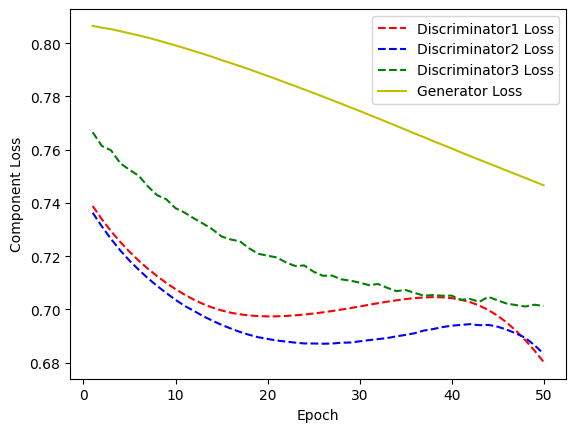

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Main_input (InputLayer)     [(None, 9)]                  0         []                            
                                                                                                  
 Generator_model (Sequentia  (None, 1)                    501       ['Main_input[0][0]']          
 l)                                                                                               
                                                                                                  
 inverse_minmax_course1 (La  (None, 1)                    0         ['Generator_model[0][0]']     
 mbda)                                                                                            
                                                                                           

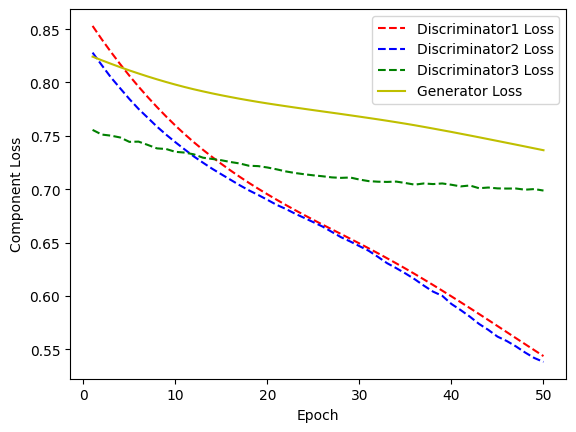

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Main_input (InputLayer)     [(None, 9)]                  0         []                            
                                                                                                  
 Generator_model (Sequentia  (None, 1)                    501       ['Main_input[0][0]']          
 l)                                                                                               
                                                                                                  
 inverse_minmax_course1 (La  (None, 1)                    0         ['Generator_model[0][0]']     
 mbda)                                                                                            
                                                                                           

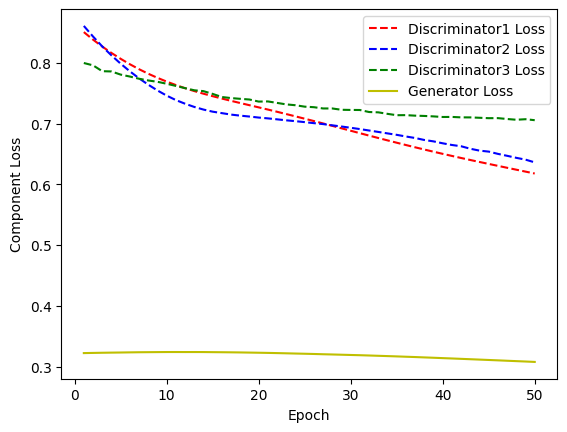

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Main_input (InputLayer)     [(None, 9)]                  0         []                            
                                                                                                  
 Generator_model (Sequentia  (None, 1)                    501       ['Main_input[0][0]']          
 l)                                                                                               
                                                                                                  
 inverse_minmax_course1 (La  (None, 1)                    0         ['Generator_model[0][0]']     
 mbda)                                                                                            
                                                                                           

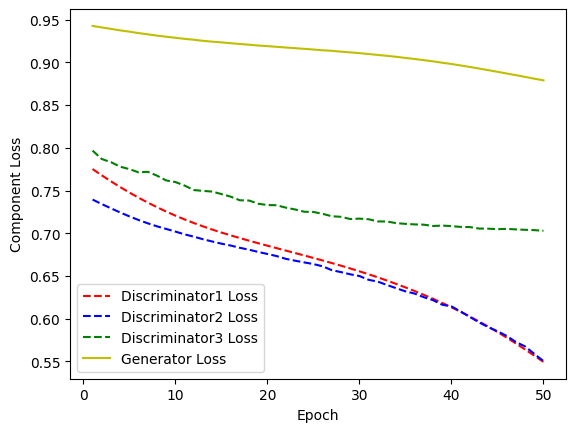

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Main_input (InputLayer)     [(None, 9)]                  0         []                            
                                                                                                  
 Generator_model (Sequentia  (None, 1)                    501       ['Main_input[0][0]']          
 l)                                                                                               
                                                                                                  
 inverse_minmax_course1 (La  (None, 1)                    0         ['Generator_model[0][0]']     
 mbda)                                                                                            
                                                                                           

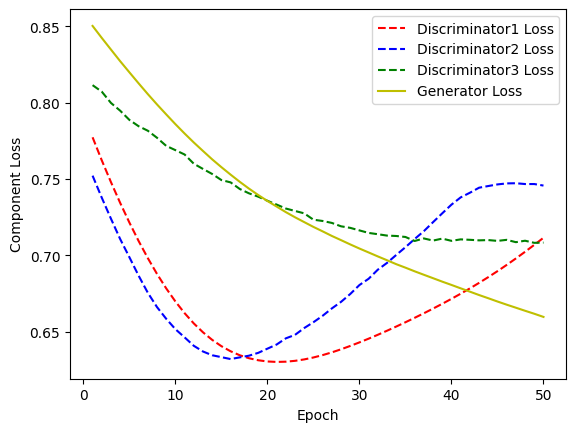

In [ ]:
model1 = Gan(data1 = X_train, y1=Y_train, data2 = X_train_school, y2 = Y_train_school, data3 = X_train_teacher, y3 = Y_train_teacher)
generator1 = model1._generator()
discriminator11 = model1._discriminator1()
discriminator21 = model1._discriminator2()
discriminator31 = model1._discriminator3()

gan_model1 = model1._GAN(generator = generator1, discriminator1 = discriminator11, discriminator2 = discriminator21, discriminator3 = discriminator31)
trained_model11 = model1.train(generator = generator1, discriminator1 = discriminator11, discriminator2 = discriminator21, discriminator3 = discriminator31, gan=gan_model1)

model2 = Gan(data1 = X_train, y1=Y_train, data2 = X_train_school, y2 = Y_train_school, data3 = X_train_teacher, y3 = Y_train_teacher)
generator2 = model2._generator()
discriminator12 = model2._discriminator1()
discriminator22 = model2._discriminator2()
discriminator32 = model2._discriminator3()

gan_model2 = model2._GAN(generator = generator2, discriminator1 = discriminator12, discriminator2 = discriminator22, discriminator3 = discriminator32)
trained_model22 = model2.train(generator = generator2, discriminator1 = discriminator12, discriminator2 = discriminator22, discriminator3 = discriminator32, gan=gan_model2)

model3 = Gan(data1 = X_train, y1=Y_train, data2 = X_train_school, y2 = Y_train_school, data3 = X_train_teacher, y3 = Y_train_teacher)
generator3 = model3._generator()
discriminator13 = model3._discriminator1()
discriminator23 = model3._discriminator2()
discriminator33 = model3._discriminator3()

gan_model3 = model3._GAN(generator = generator3, discriminator1 = discriminator13, discriminator2 = discriminator23, discriminator3 = discriminator33)
trained_model33 = model3.train(generator = generator3, discriminator1 = discriminator13, discriminator2 = discriminator23, discriminator3 = discriminator33, gan=gan_model3)

model4 = Gan(data1 = X_train, y1=Y_train, data2 = X_train_school, y2 = Y_train_school, data3 = X_train_teacher, y3 = Y_train_teacher)
generator4 = model4._generator()
discriminator14 = model4._discriminator1()
discriminator24 = model4._discriminator2()
discriminator34 = model4._discriminator3()

gan_model4 = model4._GAN(generator = generator4, discriminator1 = discriminator14, discriminator2 = discriminator24, discriminator3 = discriminator34)
trained_model44 = model4.train(generator = generator4, discriminator1 = discriminator14, discriminator2 = discriminator24, discriminator3 = discriminator34, gan=gan_model4)

model5 = Gan(data1 = X_train, y1=Y_train, data2 = X_train_school, y2 = Y_train_school, data3 = X_train_teacher, y3 = Y_train_teacher)
generator5 = model5._generator()
discriminator15 = model5._discriminator1()
discriminator25 = model5._discriminator2()
discriminator35 = model5._discriminator3()

gan_model5 = model5._GAN(generator = generator5, discriminator1 = discriminator15, discriminator2 = discriminator25, discriminator3 = discriminator35)
trained_model55 = model5.train(generator = generator5, discriminator1 = discriminator15, discriminator2 = discriminator25, discriminator3 = discriminator35, gan=gan_model5)

## Model Testing

In [ ]:
pred11 = trained_model11.predict(X_test)
pred22 = trained_model22.predict(X_test)
pred33 = trained_model33.predict(X_test)
pred44 = trained_model44.predict(X_test)
pred55 = trained_model55.predict(X_test)

57/57 [==============================] - 0s 1ms/step


In [ ]:
pred11 = pd.DataFrame(pred11)
pred22 = pd.DataFrame(pred22)
pred33 = pd.DataFrame(pred33)
pred44 = pd.DataFrame(pred44)
pred55 = pd.DataFrame(pred55)

In [ ]:
pred = pd.concat([pred11, pred22, pred33, pred44, pred55], axis=1, join='outer')
pred.columns = [1,2,3,4,5]
pred

,1,2,3,4,5
0,0.503442,0.432867,0.314330,0.250399,0.628264
1,0.340778,0.167860,0.465954,0.219480,0.535457
2,0.452546,0.077519,0.368010,0.207262,0.455649
3,0.561118,0.183928,0.251779,0.111949,0.511676
4,0.302526,0.112973,0.451005,0.236905,0.502650
...,...,...,...,...,...
1788,0.519236,0.060523,0.308317,0.129126,0.409337
1789,0.315675,0.621738,0.602126,0.579188,0.623646
1790,0.447688,0.200126,0.451093,0.302058,0.511834
1791,0.248679,0.139377,0.194477,0.081602,0.653243


In [ ]:
pred_unscale = pred.apply(np.vectorize(InverseMinMaxScaler))
pred_unscale

,1,2,3,4,5
0,332,286,207,165,415
1,225,111,308,145,353
2,299,51,243,137,301
3,370,121,166,74,338
4,200,75,298,156,332
...,...,...,...,...,...
1788,343,40,203,85,270
1789,208,410,397,382,412
1790,295,132,298,199,338
1791,164,92,128,54,431


Inverse scaling to get the top 5 predicted courses.

# Evaluation - Actualness

The actualness evaluation represents how well the model predicts the final course sequence compared to the actual sequence. This evaluation is biased when the data quality is low. For example, people may take different subjects which causes the course sequence to become very random reducing the model's ability to predict the final course sequence.

In [ ]:
import math
from statistics import mean

def apk(actual, predicted, k=5):

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):

        if p == actual:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score/k

multidgan_map_5_actual = []



for i in range(len(Y_test_unscale)):
  multidgan_map_5_actual.append(apk(Y_test_unscale.iloc[i],list(pred_unscale.iloc[i]), k=5))

map_MultiDGAN_actual = mean(multidgan_map_5_actual)
map_MultiDGAN_actual

0.0010113403978434653

In [ ]:
def hr(actual, predicted, k=5):

    num_hits = 0.0

    for i,p in enumerate(predicted):

        if p == actual:
            num_hits = 1.0
            pass

    return num_hits

multidgan_hit_5_actual = []

for i in range(len(Y_test_unscale)):
  multidgan_hit_5_actual.append(hr(Y_test_unscale.iloc[i],list(pred_unscale.iloc[i]), k=5))

hr_MultiDGAN_actual = mean(multidgan_hit_5_actual)
hr_MultiDGAN_actual

0.011154489682097044

In [ ]:
def rr(actual, predicted, k=5):

    num_hits = 0.0
    score = 0.0

    for i,p in enumerate(predicted):

        if p == actual:
            num_hits = 1.0
            score = num_hits/(i+1)
            pass

    return score

multidgan_rr_5_actual = []

for i in range(len(Y_test_unscale)):
  multidgan_rr_5_actual.append(rr(Y_test_unscale.iloc[i],list(pred_unscale.iloc[i]), k=5))

rr_MultiDGAN_actual = mean(multidgan_rr_5_actual)
rr_MultiDGAN_actual

0.0045919315857966166

In [ ]:
def ndcg(actual, predicted, k=5):


    dcg = []
    idcg = []
    gain = 0.0

    for i in range(1,k+1):
      idcg.append(1/(math.log2(i+1)))

    for i,p in enumerate(predicted):

        if p == actual:
            gain = 1.0
            dcg.append(gain/(math.log2((i+1)+1)))

        else:
            dcg.append(0)

    return (sum(dcg))/(sum(idcg))

multidgan_ndcg_5_actual = []

for i in range(len(Y_test_unscale)):
  multidgan_ndcg_5_actual.append(ndcg(Y_test_unscale.iloc[i],list(pred_unscale.iloc[i]), k=5))

ndcg_MultiDGAN_actual = mean(multidgan_ndcg_5_actual)
ndcg_MultiDGAN_actual

0.0022236288240697587

In [ ]:
evaluation_actual_list = [[map_MultiDGAN_actual, hr_MultiDGAN_actual, rr_MultiDGAN_actual, ndcg_MultiDGAN_actual]]

In [ ]:
evaluation_actual = pd.DataFrame(evaluation_actual_list, columns = ['Mean Average Precision','Hit Ratio', 'Reciprocal Rank', "Normalized Discounted Cumulative Gain"])

In [ ]:
evaluation_actual

,Mean Average Precision,Hit Ratio,Reciprocal Rank,Normalized Discounted Cumulative Gain
0,0.001011,0.011154,0.004592,0.002224


# Model Save

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file11 = "Edu_MultiMDGAN1.pkl"

with open(model_pkl_file11, 'wb') as file:
    pickle.dump(trained_model11, file)

model_pkl_file22 = "Edu_MultiMDGAN2.pkl"

with open(model_pkl_file22, 'wb') as file:
    pickle.dump(trained_model22, file)

model_pkl_file33 = "Edu_MultiMDGAN3.pkl"

with open(model_pkl_file33, 'wb') as file:
    pickle.dump(trained_model33, file)

model_pkl_file44 = "Edu_MultiMDGAN4.pkl"

with open(model_pkl_file44, 'wb') as file:
    pickle.dump(trained_model44, file)

model_pkl_file55 = "Edu_MultiMDGAN5.pkl"

with open(model_pkl_file55, 'wb') as file:
    pickle.dump(trained_model55, file)